In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [67]:
df = pd.read_csv('E:/Datasets/pima_indians_diabetes/pima-indians-diabetes.csv')
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [68]:
df.columns = ['pregnant','glucose','Blood_Pressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
df.head()

,pregnant,glucose,Blood_Pressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [69]:
df.shape

(767, 9)

In [70]:
df.isnull().values.any() #checking for null values

False

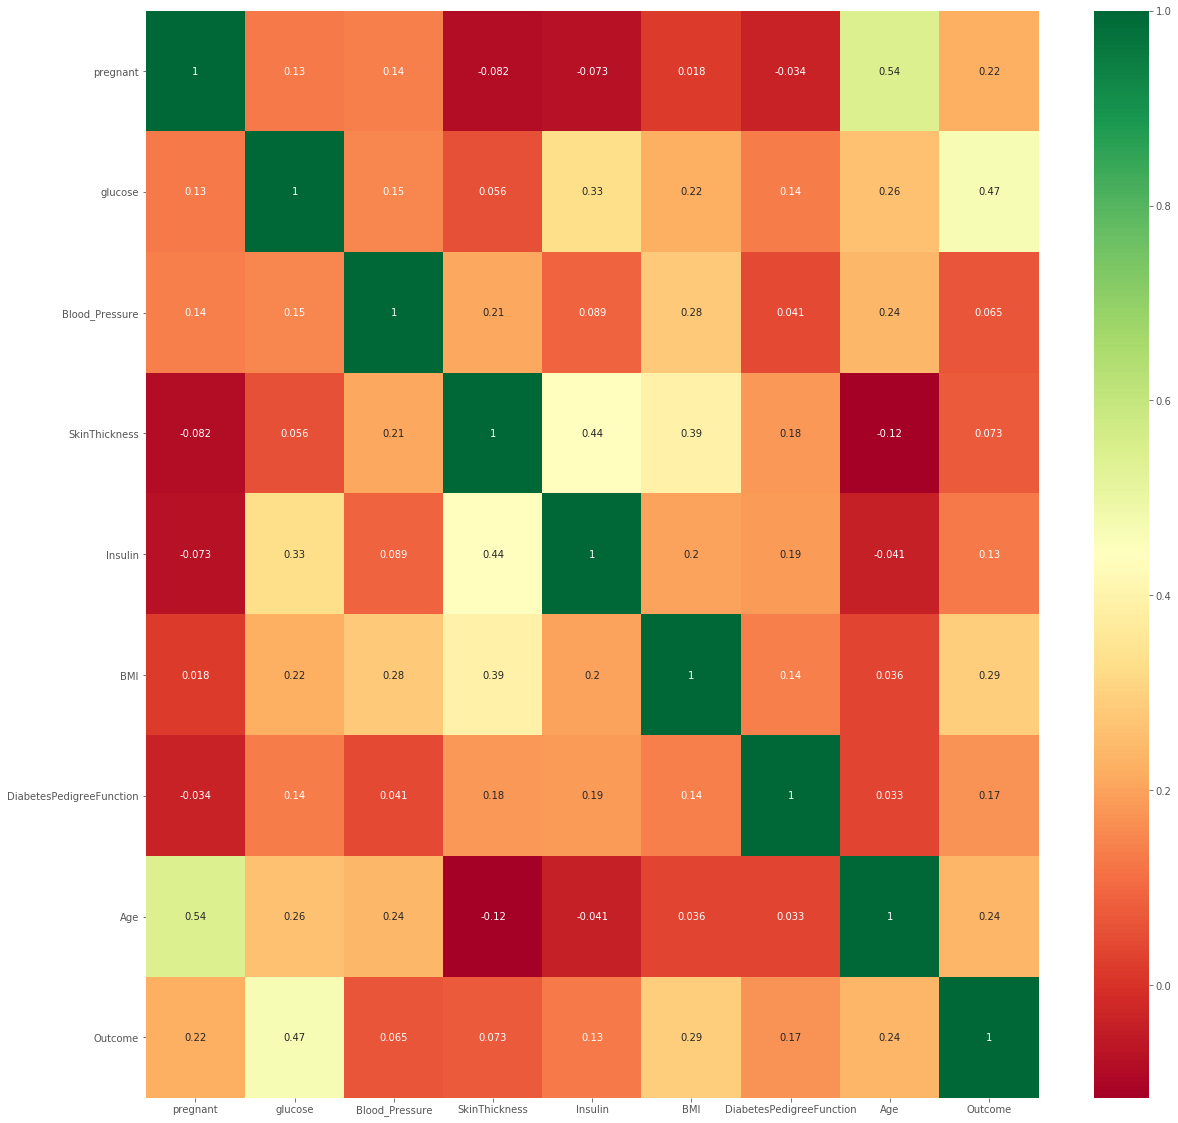

In [71]:
import seaborn as sns
corr_matrix = df.corr()
top_corr_matrix = corr_matrix.index
plt.figure(figsize = (20,20))
g=sns.heatmap(df[top_corr_matrix].corr(),annot=True,cmap="RdYlGn")

In [72]:
has_diabites = df.loc[df['Outcome']==1]
no_diabites = df.loc[df['Outcome']!=1]

In [73]:
print(len(has_diabites),len(no_diabites))

267 500


In [74]:
df.columns
feature_column = df.columns[:-1]
prediction_column = df.columns[-1:]
prediction_column

Index(['Outcome'], dtype='object')

In [75]:
from sklearn.model_selection import train_test_split
X = df[feature_column]
y = df[prediction_column]

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)

In [76]:
print('total no: ',len(df))
print("number of rows missing glucose_conc: {0}".format(len(df.loc[df['glucose']==0])))
print("number of rows missing Blood pressure: {0}".format(len(df.loc[df['Blood_Pressure']==0])))
print("number of rows missing Insulin: {0}".format(len(df.loc[df['Insulin']==0])))
print("number of rows missing BMI: {0}".format(len(df.loc[df['BMI']==0])))
print("number of rows missing Diabetes pedigree: {0}".format(len(df.loc[df['DiabetesPedigreeFunction']==0])))
print("number of rows missing Age: {0}".format(len(df.loc[df['Age']==0])))

total no:  767
number of rows missing glucose_conc: 5
number of rows missing Blood pressure: 35
number of rows missing Insulin: 373
number of rows missing BMI: 11
number of rows missing Diabetes pedigree: 0
number of rows missing Age: 0


In [77]:
from sklearn.preprocessing import Imputer
fill_values = Imputer(missing_values = 0,strategy = 'mean',axis = 0)

X_train =  fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

C:\Users\RONAK JAIN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train,y_train)
clf.predict(X_test)
clf.predict_proba(X_test)
l_Reg_score = clf.score(X_test, y_test)
l_Reg_score

C:\Users\RONAK JAIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RONAK JAIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7922077922077922

# Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
random_f_model = RandomForestClassifier(random_state = 10)
random_f_model.fit(X_train,y_train)

C:\Users\RONAK JAIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\RONAK JAIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [80]:
predict_train_data = random_f_model.predict(X_test)

from sklearn import metrics
print('Accuracy = {0:.3f}'.format(metrics.accuracy_score(y_test,predict_train_data)))

Accuracy = 0.799


In [81]:
#will try to optimize the accuracy by hyper parameter tuning
params = {
    'learning _rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth'      : [3,4,5,6,8,10,12,15],
    "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [82]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [83]:
classifier = xgboost.XGBClassifier()

In [84]:
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs= -1,cv = 5,verbose = 3)

In [85]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [86]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   45.4s remaining:   14.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   45.4s finished
C:\Users\RONAK JAIN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RONAK JAIN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 Time taken: 0 hours 0 minutes and 45.68 seconds.


In [87]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0.3,
       learning _rate=0.05, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [88]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
       learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=5, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [89]:
classifier.fit(X_train,y_train)

C:\Users\RONAK JAIN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RONAK JAIN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
       learning_rate=0.2, max_delta_step=0, max_depth=3,
       min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [90]:
y_pred = classifier.predict(X_test)

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score
con_matrix = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)

print(con_matrix)
print(score)

[[84 17]
 [21 32]]
0.7532467532467533


In [92]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier,X,y,cv = 10) # Determines the cross-validation splitting strategy

C:\Users\RONAK JAIN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RONAK JAIN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RONAK JAIN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RONAK JAIN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

In [93]:
score.mean()

0.7497949419002051